## <p style="text-align: right;">  Nic Wiggins </p>

You **NEED** to participate both individually and in groups in class to successfully complete this assignment and receive credits for it.

# In-Class Assignment: Transformations

<img src="https://people.gnome.org/~mathieu/libart/art-affines.png">

<p style="text-align: right;">Image from: https://people.gnome.org/~mathieu/libart/libart-affine-transformation-matrices.html</p>
    

### Agenda for today's class (80 minutes)

</p>
1. (20 minutes) Review of Pre-Class Assignment
1. (30 minutes) Affine Transforms
1. (30 minutes) Fractals

----
# 1. Review of Pre-Class Assignment

[05--Transformations-pre-class-assignment](../preclass/05--Transformations-pre-class-assignment.ipynb)

----
# 2. Affine Transforms

In this section, we are going to explore different types of transformation matrices. 
The following code is designed to demonstrate the properties of some different transformation matrices.  

&#9989; <font color=red>**DO THIS:**</font> Review the following code.  

In [2]:
#Some python packages we will be useing
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D #Lets us make 3D plots
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True) # Trick to make matrixes look nice in jupyter

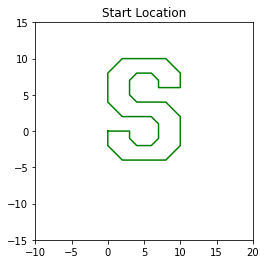

In [3]:
# Define some points
x = [0.0,  0.0,  2.0,  8.0, 10.0, 10.0, 8.0, 4.0, 3.0, 3.0, 4.0, 6.0, 7.0, 7.0, 10.0, 
     10.0,  8.0,  2.0, 0.0, 0.0, 2.0, 6.0, 7.0,  7.0,  6.0,  4.0,  3.0, 3.0, 0.0]
y = [0.0, -2.0, -4.0, -4.0, -2.0,  2.0, 4.0, 4.0, 5.0, 7.0, 8.0, 8.0, 7.0, 6.0,  6.0,
     8.0, 10.0, 10.0, 8.0, 4.0, 2.0, 2.0, 1.0, -1.0, -2.0, -2.0, -1.0, 0.0, 0.0]
con = [ 1.0 for i in range(len(x))] 

p = np.matrix([x,y,con])


mp = p.copy()

#Plot Points
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green');
plt.axis('scaled');
plt.axis([-10,20,-15,15]);
plt.title('Start Location');

### Example Scaling Matrix

⎡0.5  0.0  0.0⎤
⎢             ⎥
⎢0.0  0.5  0.0⎥
⎢             ⎥
⎣0.0  0.0  1.0⎦

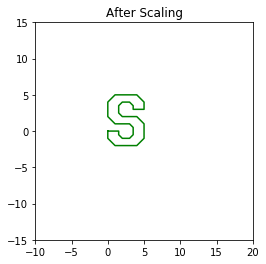

In [3]:
#Example Scaling Matrix

#Define Matrix
scale = 0.5
S = np.matrix([[scale,0,0], [0,scale,0], [0,0,1]])

#Apply matrix

mp = p.copy()

mp = S*mp

#Plot points after transform
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green')
plt.axis('scaled')
plt.axis([-10,20,-15,15])
plt.title('After Scaling')

sym.Matrix(S)

### Example Transpose Matrix

⎡1  0  1⎤
⎢       ⎥
⎢0  1  1⎥
⎢       ⎥
⎣0  0  1⎦

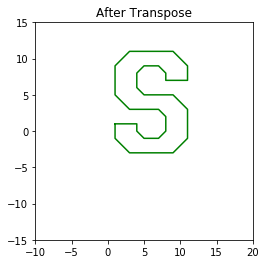

In [4]:
#Example Transpose Matrix

#Define Matrix
dx = 1
dy = 1
T = np.matrix([[1,0,dx], [0,1,dy], [0,0,1]])

#Apply matrix

mp = p.copy()

mp = T*mp

#Plot points after transform
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green')
plt.axis('scaled')
plt.axis([-10,20,-15,15])
plt.title('After Transpose')

sym.Matrix(T)

### Example Reflection Matrix

⎡1  0   0⎤
⎢        ⎥
⎢0  -1  0⎥
⎢        ⎥
⎣0  0   1⎦

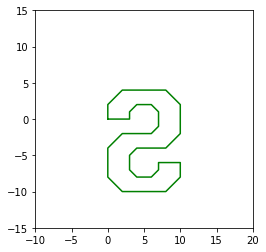

In [5]:
#Example Reflection Matrix

#Define Matrix
Re = np.matrix([[1,0,0],[0,-1,0],[0,0,1]])

#Apply matrix

mp = p.copy()

mp = Re*mp

#Plot points after transform
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green')
plt.axis('scaled')
plt.axis([-10,20,-15,15])

sym.Matrix(Re)

### Example Rotation Matrix

⎡0.866025403784439        -0.5         0.0⎤
⎢                                         ⎥
⎢       0.5         0.866025403784439  0.0⎥
⎢                                         ⎥
⎣       0.0                0.0         1.0⎦

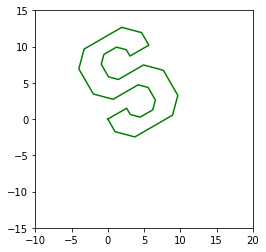

In [28]:
#Example Rotation Matrix

#Define Matrix
theta = np.pi / 6
R = np.matrix([[np.cos(theta),-np.sin(theta),0],[np.sin(theta), np.cos(theta),0],[0,0,1]])

#Apply matrix

mp = p.copy()

mp = R*mp

#Plot points after transform
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green')
plt.axis('scaled')
plt.axis([-10,20,-15,15])

sym.Matrix(R)

### Example Shear Matrix

⎡1.0   0.1  0.0⎤
⎢              ⎥
⎢-0.5  1.0  0.0⎥
⎢              ⎥
⎣0.0   0.0  1.0⎦

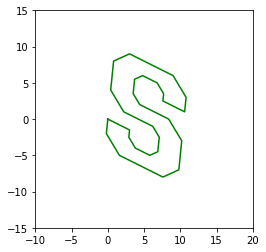

In [7]:
#Example Shear Matrix

#Define Matrix
shx = 0.1
shy = -0.5
SH = np.matrix([[1,shx,0], [shy,1,0], [0,0,1]])

#Apply matrix

mp = p.copy()

mp = SH*mp

#Plot points after transform
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green')
plt.axis('scaled')
plt.axis([-10,20,-15,15])

sym.Matrix(SH)

### Combine Transforms

We have five transforms $R$, $S$, $T$, $Re$, and $SH$ 

&#9989; <font color=red>**DO THIS:**</font> Construct a ($3 \times 3$) transformation Matrix (called $M$) which combines these five transforms into a single matrix. You can choose different orders for these five matrix, then compare your result with other students. 

In [8]:
#Put your code here
# First operation is right most, read right to left
M = Re*T*S*R*SH

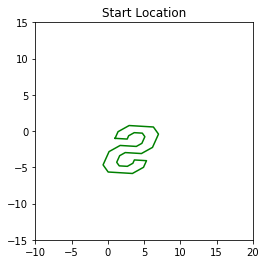

In [9]:
#Plot combined transformed points
mp = p.copy()
mp = M*mp
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green');
plt.axis('scaled');
plt.axis([-10,20,-15,15]);
plt.title('Start Location');

&#9989; <font color=red>**Questions:**</font> Did you can get the same result with others? You can compare the matrix $M$ to see the difference. If not, can you explain why it happens?

No
Translate, scale and reflect are the same despite order, once you include rotatation and shear the order matters.

## Interactive Example

In [10]:
from ipywidgets import interact

def affine_image(angle=0,scale=1.0,dx=0,dy=0, shx=0, shy=0):
    theta = -angle/180  * np.pi
    
    plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0], color='green')
    
    S = np.matrix([[scale,0,0], [0,scale,0], [0,0,1]])
    SH = np.matrix([[1,shx,0], [shy,1,0], [0,0,1]])
    T = np.matrix([[1,0,dx], [0,1,dy], [0,0,1]])
    R = np.matrix([[np.cos(theta),-np.sin(theta),0],[np.sin(theta), np.cos(theta),0],[0,0,1]])
    
    #Apply Transforms
    p2 =  T*SH*R*S*p;
    
    #Plot Output
    plt.plot(p2[0,:].tolist()[0],p2[1,:].tolist()[0], color='black')
    plt.axis('scaled')
    plt.axis([-10,20,-15,15])

In [11]:
interact(affine_image, angle=(-180,180), scale=(0.01,2), dx=(-5,15,0.5), dy=(-15,15,0.5), shx = (-1,1,0.1), shy = (-1,1,0.1)); ##TODO: Modify this line of code

interactive(children=(IntSlider(value=0, description='angle', max=180, min=-180), FloatSlider(value=1.0, descr…

&#9989; <font color=red>**DO THIS:**</font>  Using the above interactive enviornment to see if you can figure out the transformation matrix to make the following image:

<img src="https://lh6.googleusercontent.com/_0-jr5Z0DQzqVM3TD3Xa3QWC43PBT6ru5M-B-_7dfbib2SSvkNkxtioBFaU__jTvEJMMG9SAVg=w380">

&#9989; <font color=red>**Questions:**</font> What where the input values?


Put your answer here:

r =  172

scale = 0.91

dx = 11.00

dy = -7.5

shx = -0.4

shy = -0.1

----

# 3. Fractals

In this assignment, you will follow the psudocode written on page 136 of the textbook to generate figures similar to Figure 2.24. 



For the $T_1$ case, we have 

$$ 
T_1\left[ \begin{matrix}
    x \\
    y 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    0.86 & 0.03  \\
    -0.03 & 0.86 
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x \\
    y 
 \end{matrix}
\right] +
\left[\begin{matrix}
0\\
1.5
\end{matrix}
\right]
$$ 

Therefore, we have introduce an additional variable $z=1$ and it becomes 
$$ 
T_1\left[ \begin{matrix}
    x \\
    y 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    0.86 & 0.03 & 0 \\
    -0.03 & 0.86 & 1.5
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x \\
    y \\
    z
 \end{matrix}
\right] 
$$ 
Please NOTE that we do not change the value for $z$, and it is alwasy $1$.

1. Let $x = 0$, $y = 0$, $z=1$
2. Use a random generator to select one of the affine transformations $T_i$ according to the given probabilities.
3. Let $(x',y') = T_i(x,y,z)$.
4. Plot $(x', y')$
5. Let $(x,y) = (x',y')$
6. Repeat Steps 2, 3, 4, and 5 twenty thousand times. 

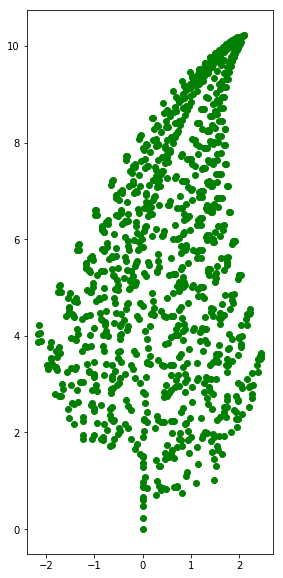

In [32]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

T1 = np.matrix([[ 0.86,  0.03, 0],[-0.03, 0.86, 1.5]])
T2 = np.matrix([[  0.2, -0.25, 0],[ 0.21, 0.23, 1.5]])
T3 = np.matrix([[-0.15,  0.27, 0],[ 0.25, 0.26, 0.45]])
T4 = np.matrix([[    0,     0, 0],[    0, 0.17, 0]])

prob = [0.83,0.08,0.08,0.01]

I = np.matrix([[1,0,0],[0,1,0],[0,0,1]])

fig = plt.figure(figsize=[10,10])
p = np.matrix([[0.],[0],[1]])
plt.plot(p[0],p[1], 'go');
for i in range(1,1000):
    ticket = np.random.random();
    if (ticket < prob[0]):
        T = T1
    elif (ticket < sum(prob[0:2])):
        T = T2
    elif (ticket < sum(prob[0:3])):
        T = T3
    else:
        T = T4
    p[0:2,0] = T*p    
    plt.plot(p[0],p[1], 'go');
plt.axis('scaled');

In [34]:
sym.Matrix(T1)

⎡0.86   0.03  0.0⎤
⎢                ⎥
⎣-0.03  0.86  1.5⎦

&#9989; <font color=red>**Do This:**</font> In your group, discuss each of the four transformation matrices and understand what type of transformation is made for each.

&#9989; <font color=red>**QUESTION:**</font>  Describe in words for the actions performed by $T_1$, $T_2$, $T_3$, and $T_4$. 

$T_1$: Scale, shear, translate up

$T_2$: shear, Rotation, translate up

$T_3$: Reflection (negative) , Rotation, translate up


$T_4$: Scale y

&#9989; <font color=red>**DO THIS:**</font> Using the same ideas to design and build your own fractal.  You are welcome to get inspiration from the internet just make sure you document where your inspiration comes from.  Try to build something fun, unique and different.

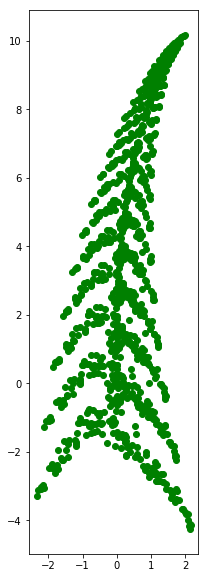

In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

T1 = np.matrix([[ 0.86,  0.03, 0],[-0.03, 0.86, 1.5]])
T2 = -1*np.matrix([[  0.2, -0.25, 0],[ 0.21, 0.23, 1.5]])
T3 = -1*np.matrix([[-0.15,  0.27, 0],[ 0.25, 0.26, 0.45]])
T4 = np.matrix([[    0,     0, 0],[    0, 0.17, 0]])

prob = [0.83,0.08,0.08,0.01]

I = np.matrix([[1,0,0],[0,1,0],[0,0,1]])

fig = plt.figure(figsize=[10,10])
p = np.matrix([[0.],[0],[1]])
plt.plot(p[0],p[1], 'go');
for i in range(1,1000):
    ticket = np.random.random();
    if (ticket < prob[0]):
        T = T1
    elif (ticket < sum(prob[0:2])):
        T = T2
    elif (ticket < sum(prob[0:3])):
        T = T3
    else:
        T = T4
    p[0:2,0] = T*p    
    plt.plot(p[0],p[1], 'go');
plt.axis('scaled');

-----
### Congratulations, we're done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's dropbox (Don't forget to add your names in the first cell).


&#169; Copyright 2018,  Michigan State University Board of Trustees